<a href="https://colab.research.google.com/github/AmiMunshi/NewSignal-ImageProcessing/blob/main/SIP_Expt3b_Spatial_resolution_Down_and_up_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spatial Resolution: Down-sampling and Up-sampling

In [1]:
# Import cv2, matplotlib, numpy
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Read the original image and know its type
img1= cv2.imread('/content/cameraman.tif',0)
type(img1)

numpy.ndarray

In [8]:
np.max(img1)

255

In [ ]:
cv2.imwrite('original_img.png',img1)

True

In [3]:
# Obtain the size of the original image
[m,n]=img1.shape
print(m,n)

512 512


In [4]:
# Ask sampling rate for down sampling from the user
f= int(input("Enter the down sampling rate: " ))

Enter the down sampling rate: 2


In [5]:
#Create a matrix of all zeros for downsampled values 
img2= np.zeros((m//f,n//f), dtype=np.int)

#Assign the down sampled values from the original image according to the down sampling frequency.
#For example, if the down sampling rate f=2, take pixel values from alternate rows and columns 
#and assign them in the matrix created above 
for i in range (0,m,f):
    for j in range (0,n,f):
        try:
            
            img2[i//f][j//f]= img1[i][j] 
        except IndexError:
            pass
        

In [6]:
#Ascertain resolution of the new down sampled image
img2.shape

(256, 256)

In [ ]:
cv2.imwrite('downsampled64_img.jpg',img2)

True

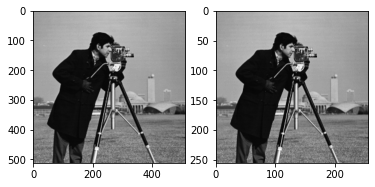

In [7]:
#Show original image
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
#Show down sampled image
plt.subplot(1,2,2)
plt.imshow(img2,cmap='gray')

In [ ]:
# Up sampling
#img3= cv2.imread("sampled_img.png",0)
#[m1,n1]= img3.shape
#print(m1,n1)

In [ ]:
#Create matrix of zeros to store the upsampled image
img3= np.zeros((m , n), dtype= np.int)
#new size
for i in range(0, m-(f-1), f):
    for j in range(0, n-(f-1), f):
        img3[i,j]= img2[i//f][j//f] 

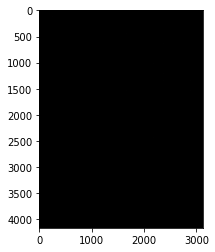

In [ ]:
plt.imshow(img3, cmap="gray")

In [ ]:
# Nearest neighbour interpolation-Replication, Replicating rows
for i in range(1,m-(f-1),f):
    for j in range(0,n-(f-1)):
        img3[i:i+(f-1),j]= img3[i-1,j]

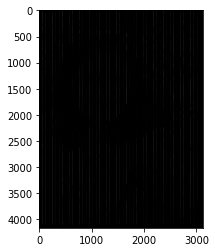

In [ ]:
plt.imshow(img3, cmap="gray")

In [ ]:
#Replicating columns
for i in range(0,m-1):
    for j in range(1,n-1,f):
        img3[i,j:j+(f-1)]= img3[i,j-1]

In [ ]:
# Save the upsampled image
cv2.imwrite('upsampled64.jpg',img3)

True

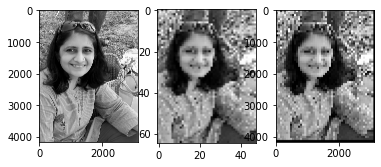

In [ ]:

#Show original image
plt.subplot(1,3,1)
plt.imshow(img1, cmap='gray')
#Show down sampled image
plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
#Show the up sampled image
plt.subplot(1,3,3)
plt.imshow(img3, cmap="gray")

In [ ]:
cv2.imwrite('up_sampled_img.png',img3)

True

In [ ]:
# Averaging neighbouring row pixels to get current pixel value
img4= np.zeros((m , n), dtype= np.int)
#new size
for i in range(0, m-1, f):
    for j in range(0, n-1, f):
        img4[i,j]= img2[i//f][j//f] 

        

In [ ]:
for i in range(1, m-1,f):
    for j in range(0, n-1):
        img4[i,j]= (img4[i-1,j]+img4[i+1,j])/2

In [ ]:
# Averaging neighbouring column pixels to get current pixel value
for i in range(0, m-1):
    for j in range(1, n-1,f):
        img4[i,j]= (img4[i,j-1]+img4[i,j+1])/2

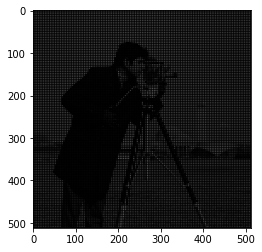

In [ ]:
plt.imshow(img4,cmap="gray")